# Pronósticos

## Simples

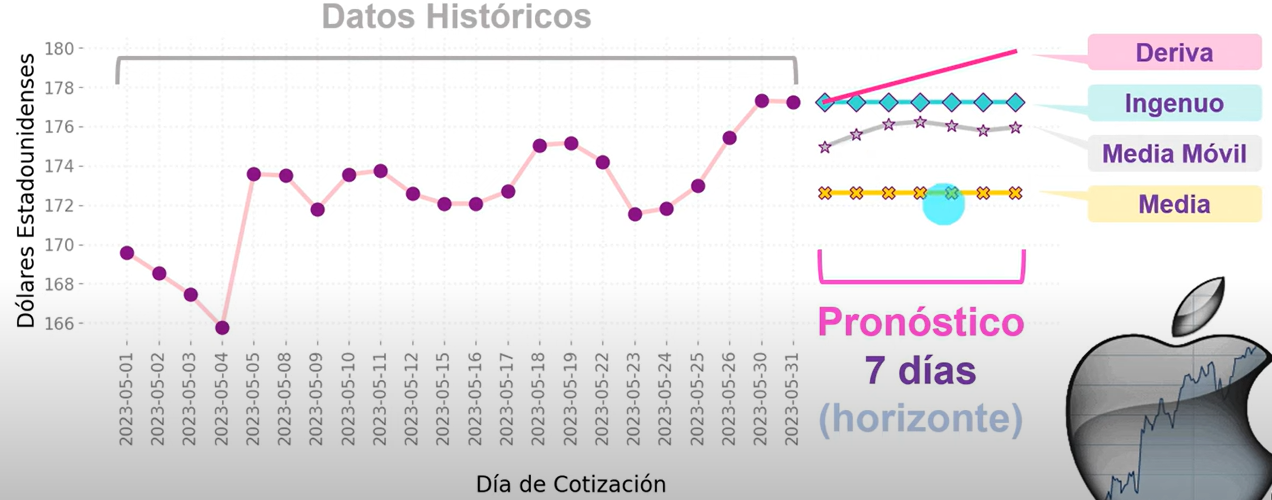

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
forecast = 7

data = pd.read_csv("../../data/raw/apple.csv")
data = data[["fecha", "valor"]].set_index("fecha")

forecast_range =  np.arange(data.index.size, data.index.size + forecast)

### Ingenuo

$$\hat y_t = y_{t-1}$$

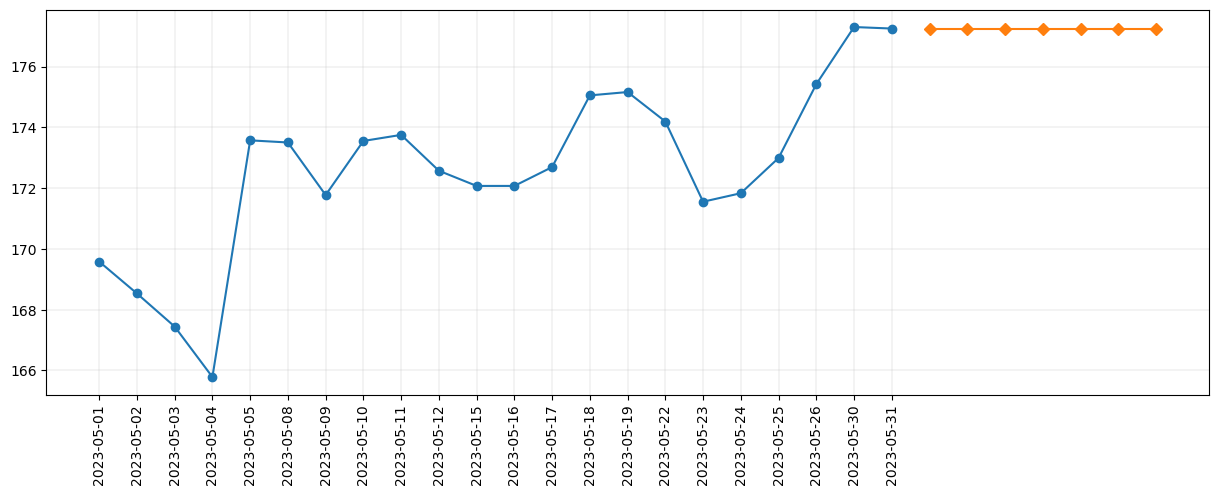

In [23]:
plt.figure(figsize = (15, 5))
plt.plot(data.index, data["valor"], marker = "o")
plt.plot(forecast_range, 
         [data["valor"][-1:]] * forecast,
         label = "Metodo ingenuo",
         marker = "D")
plt.tick_params(axis="x", labelrotation = 90)
plt.grid(linewidth = 0.2)
plt.show()

### Media

$$\hat y_t =\bar y = \frac{1}{t} \sum_{i=1}^t y_i$$

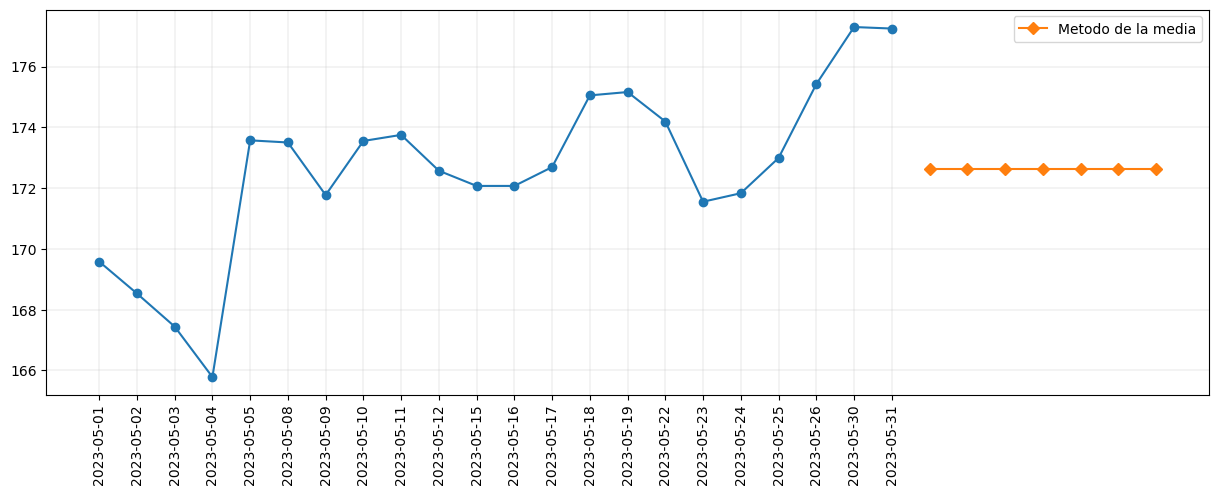

In [26]:
plt.figure(figsize = (15, 5))
plt.plot(data.index, data["valor"], marker = "o")
plt.plot(forecast_range, 
         [data["valor"].mean()] * forecast,
         label = "Metodo de la media",
         marker = "D")
plt.tick_params(axis="x", labelrotation = 90)
plt.grid(linewidth = 0.2)
plt.legend()
plt.show()

### Media movil

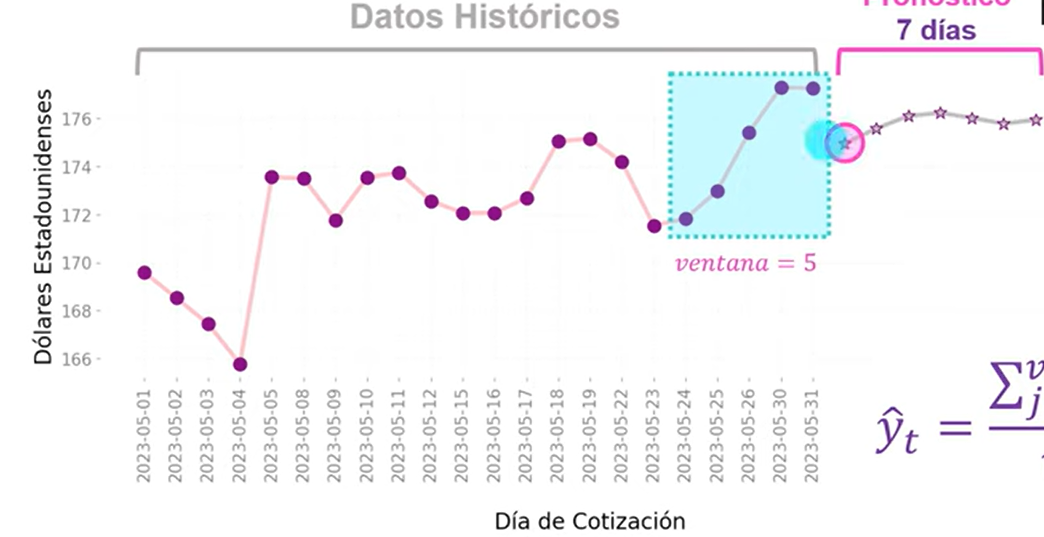

$$\hat y_t = \frac{\sum_{j=1}^{ventana}y_{t-j}}{ventana}$$

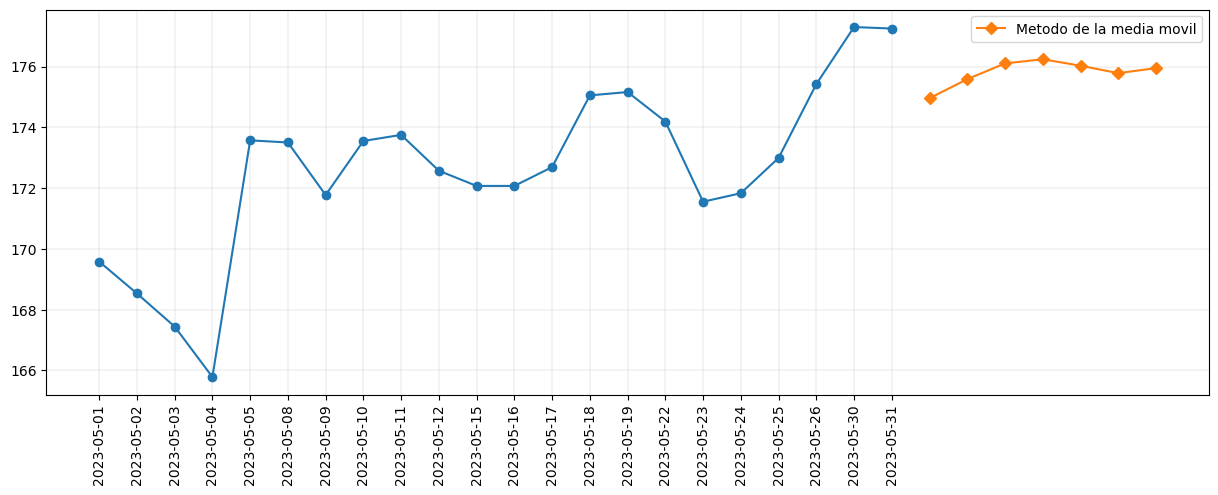

In [50]:
plt.figure(figsize = (15, 5))
plt.plot(data.index, data["valor"], marker = "o")

k = 5

k_moving = np.array(data["valor"][-k:].values)

predictions = np.array([])
for t in range(forecast):
    k_moving = np.append(k_moving[1:], k_moving.mean())
    predictions = np.append(predictions, k_moving[-1:])

plt.plot(forecast_range, 
         predictions,
         label = "Metodo de la media movil",
         marker = "D")
plt.tick_params(axis="x", labelrotation = 90)
plt.grid(linewidth = 0.2)
plt.legend()
plt.show()

### Deriva

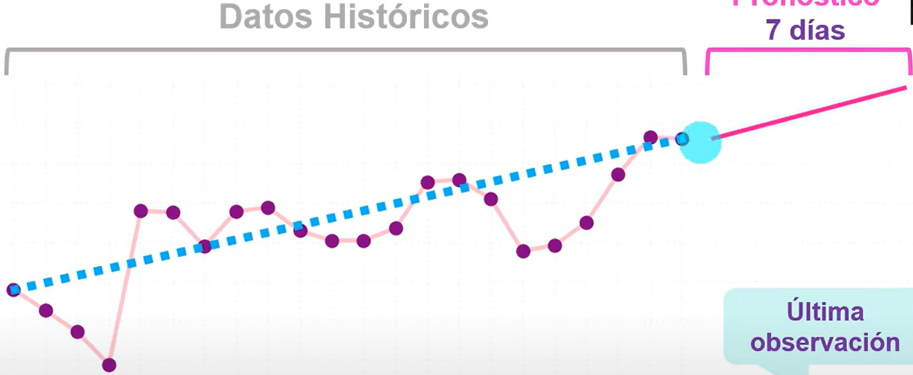

$$\hat y_t = y_{t-1} + h \left(\frac{y_{t-1} - y_1}{t-1}\right)$$

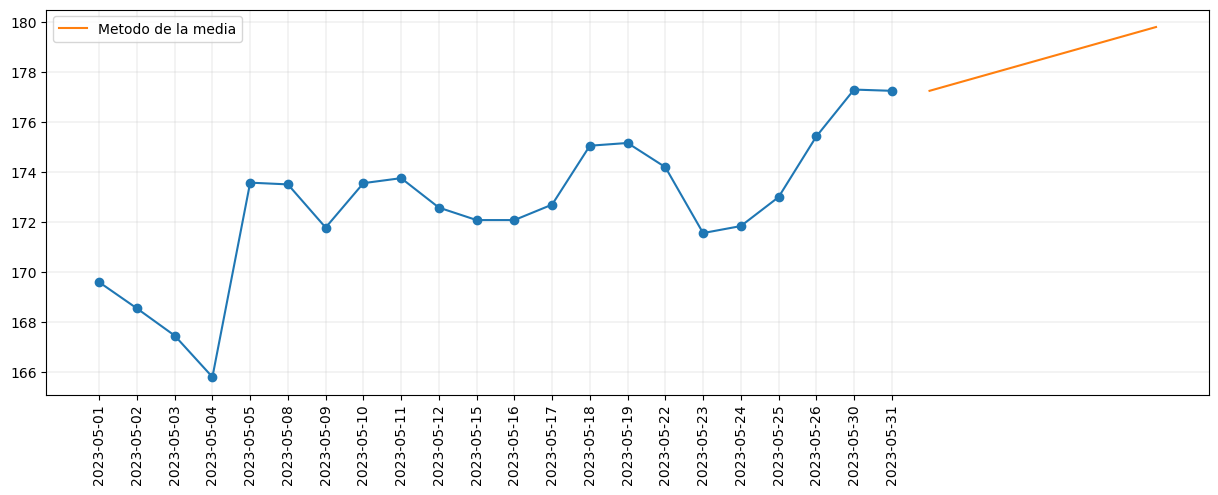

In [45]:
plt.figure(figsize = (15, 5))
plt.plot(data.index, data["valor"], marker = "o")
plt.plot([data.index.size, data.index.size + forecast - 1], 
         [data["valor"][-1], data["valor"][-1] + forecast * ((data["valor"][-1] - data["valor"][0]) / (len(data["valor"]) - 1))],
         label = "Metodo de la media")
plt.tick_params(axis="x", labelrotation = 90)
plt.grid(linewidth = 0.2)
plt.legend()
plt.show()

## Complejos

### Suavización exponencial

Se usa cuando tenemos series de tiempo sin patrones y sin patrón estacional. Este método busca darle más peso a las observaciones recientes y menos a las observaciones más antiguas por medio de un coeficiente de suavización $\alpha$

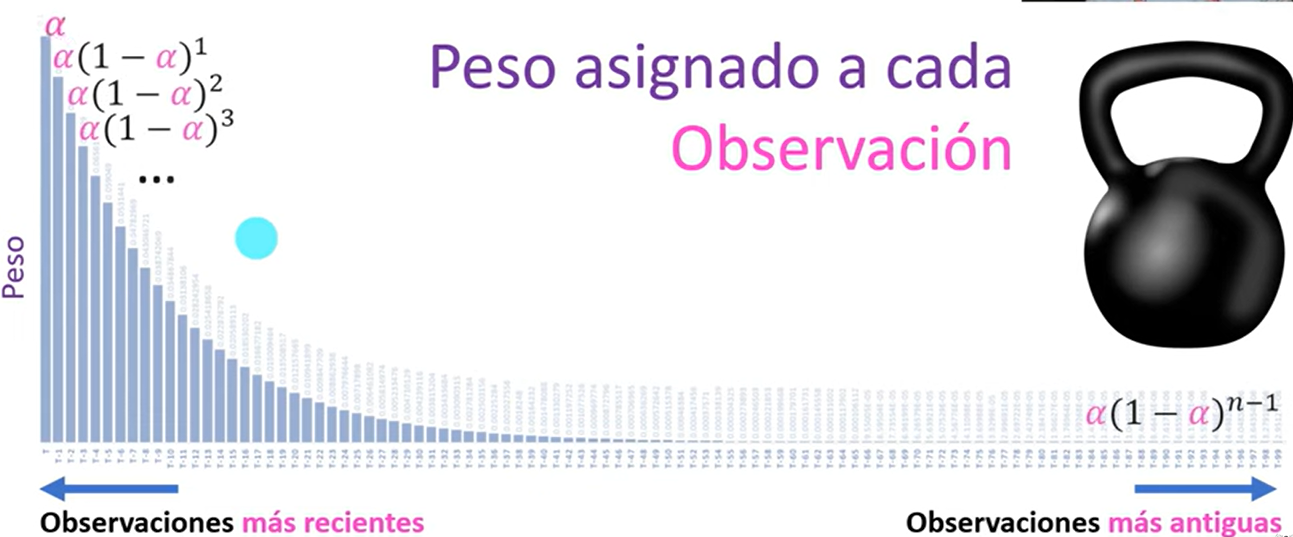

$\alpha$ se selecciona en un valor más pequeño si queremos que las observaciones más antiguas tengan un buen peso, en cambio si no queremos que tengan apenas peso, se le pone un valor más cercano a 1.

Para hacer una predicción sería así:

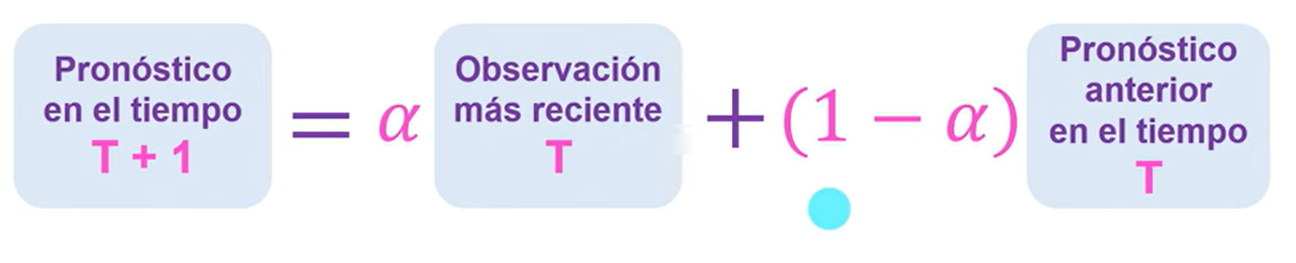

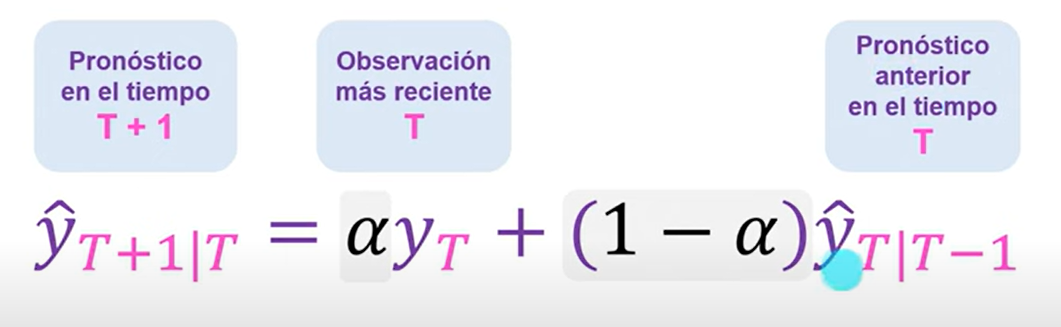

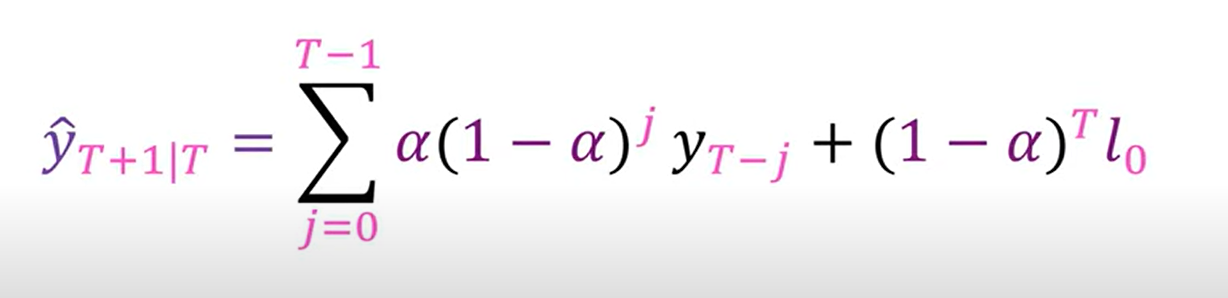

Donde $l_0$ es el valor por defecto o nivel inicial, comunmente se define como $y_1$

Para optimizar $\alpha$ se busca reducir los errores:

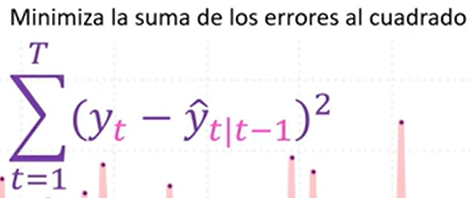

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

In [53]:
data = pd.read_csv("../../data/raw/serie_de_tiempo_nacimientos.csv")
data = data.set_index("fecha")
data.head()

,nacimientos
fecha,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


c:\Users\JUAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\JUAN\AppData\Local\Temp\ipykernel_5400\1624312644.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])


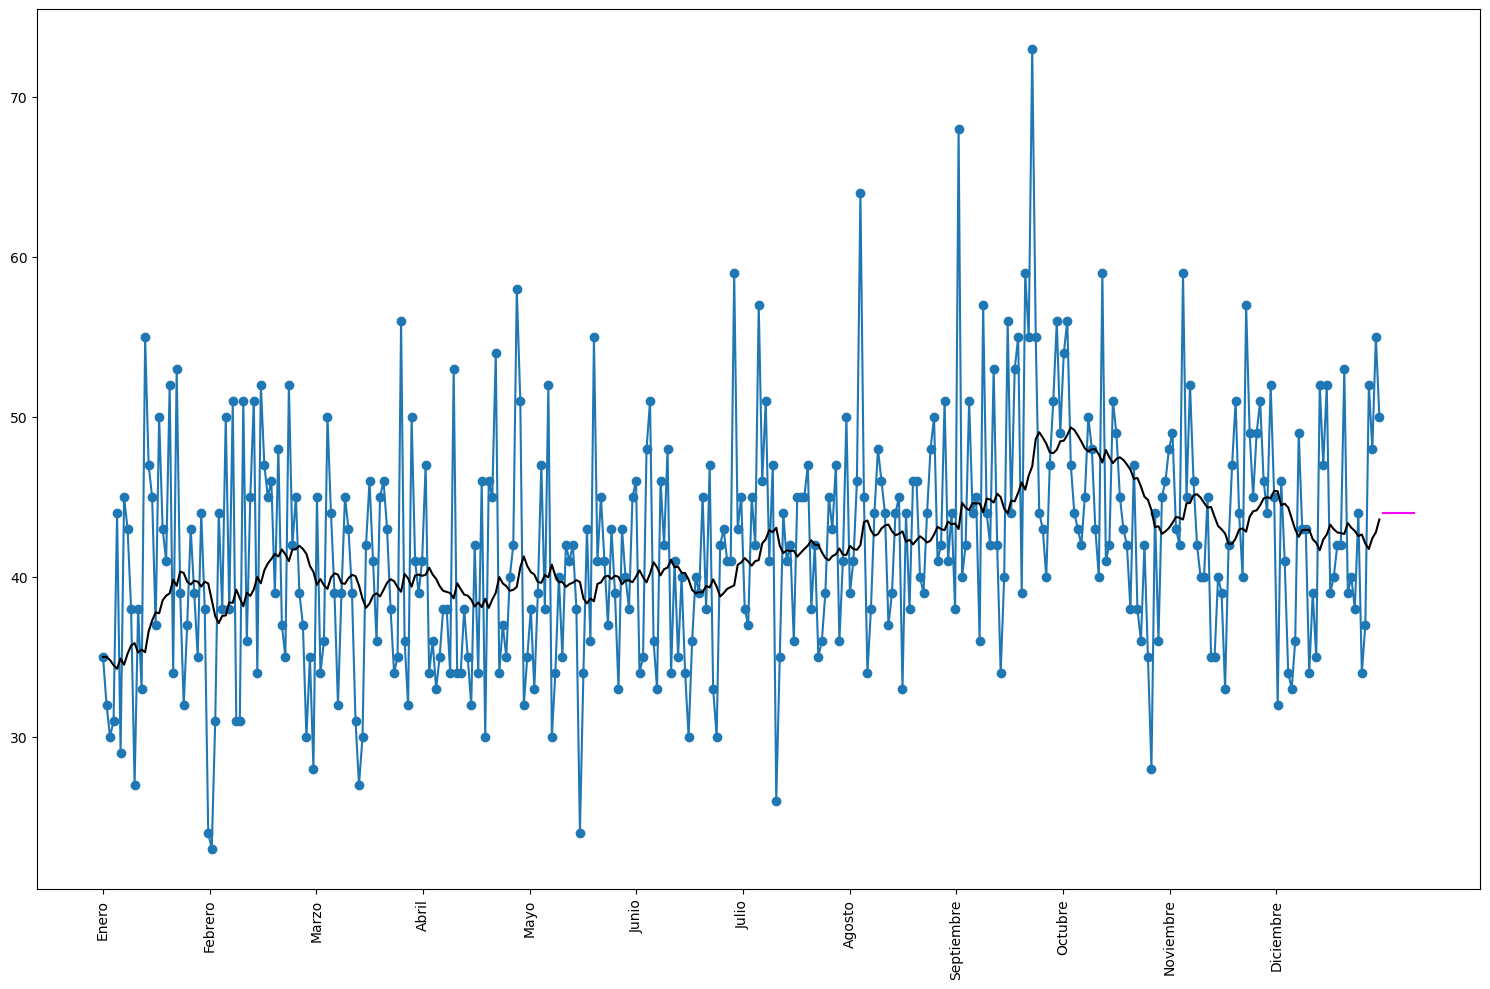

In [68]:
# Tiempo a predecir
h = 10

h_range = np.arange(data.index.size, data.index.size + h)

fig, ax = plt.subplots(figsize = (15, 10))

ax.plot(data.index, data["nacimientos"], marker="o")

ax.tick_params(axis="x", labelrotation = 90)

ses = SimpleExpSmoothing(data["nacimientos"])
model = ses.fit()
forecast = model.forecast(h)

ax.plot(h_range, forecast, color="magenta")
ax.plot(data.index, model.fittedvalues, color="black")

ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
ax.xaxis.set_ticks(np.arange(0, data["nacimientos"].size, data["nacimientos"].size / 12))
plt.tight_layout()

In [69]:
model.params

{'smoothing_level': 0.06566659761775127,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 35.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

c:\Users\JUAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\JUAN\AppData\Local\Temp\ipykernel_5400\1297138541.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])


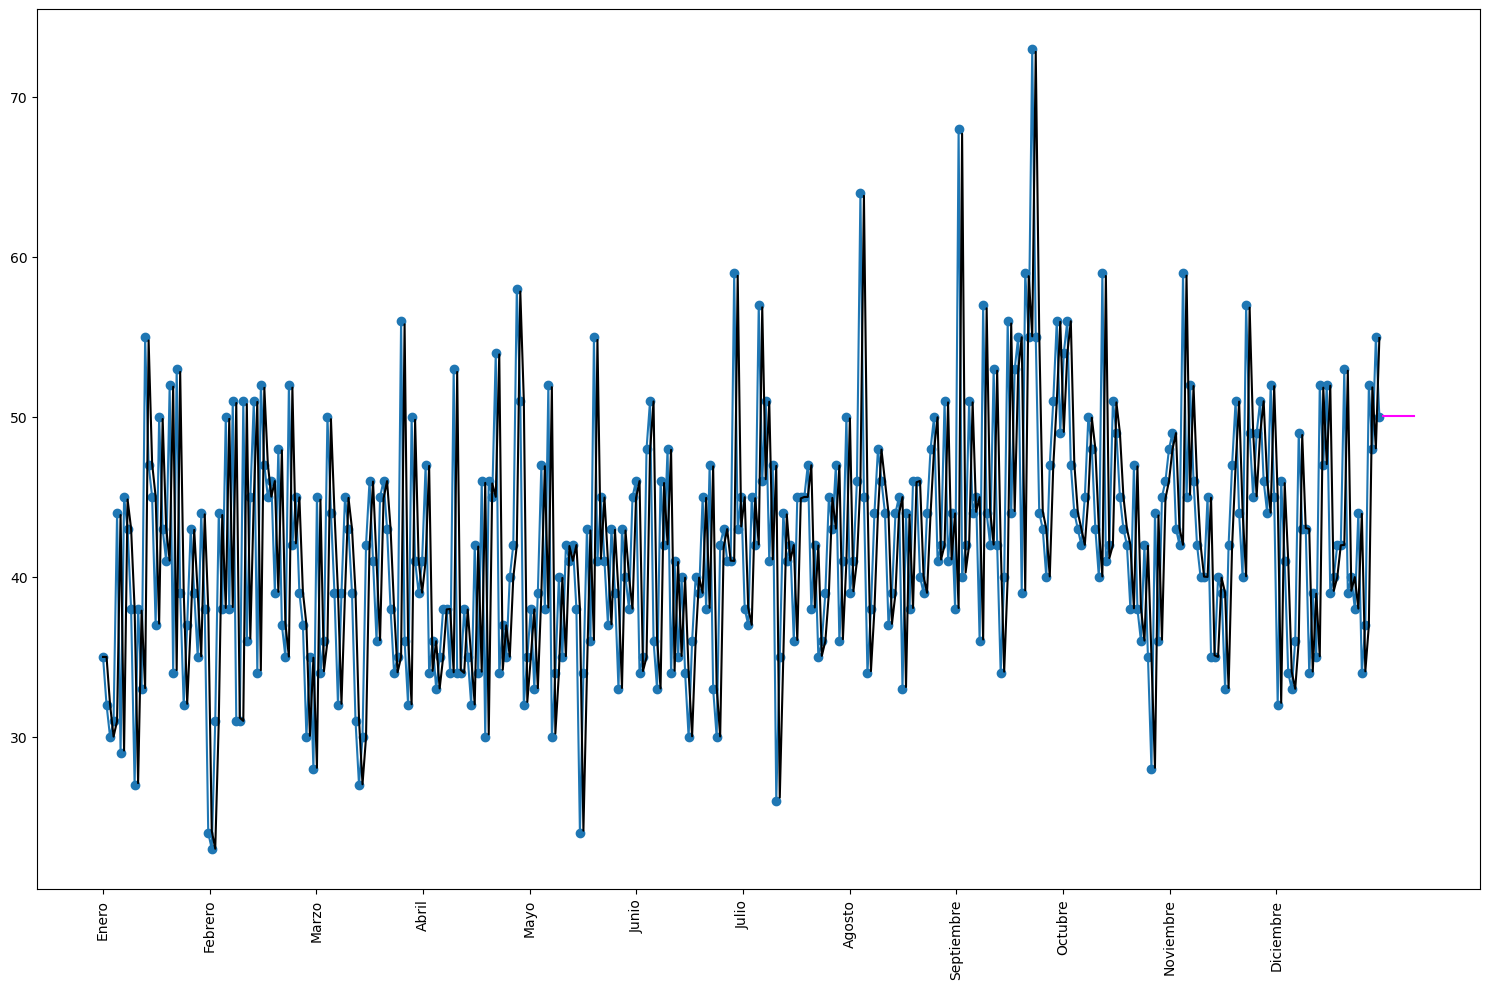

In [70]:
# Tiempo a predecir
h = 10

h_range = np.arange(data.index.size, data.index.size + h)

fig, ax = plt.subplots(figsize = (15, 10))

ax.plot(data.index, data["nacimientos"], marker="o")

ax.tick_params(axis="x", labelrotation = 90)

ses = SimpleExpSmoothing(data["nacimientos"])
model = ses.fit(smoothing_level=0.99, optimized = False)
forecast = model.forecast(h)

ax.plot(h_range, forecast, color="magenta")
ax.plot(data.index, model.fittedvalues, color="black")

ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
ax.xaxis.set_ticks(np.arange(0, data["nacimientos"].size, data["nacimientos"].size / 12))
plt.tight_layout()

c:\Users\JUAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\JUAN\AppData\Local\Temp\ipykernel_5400\2339633528.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])


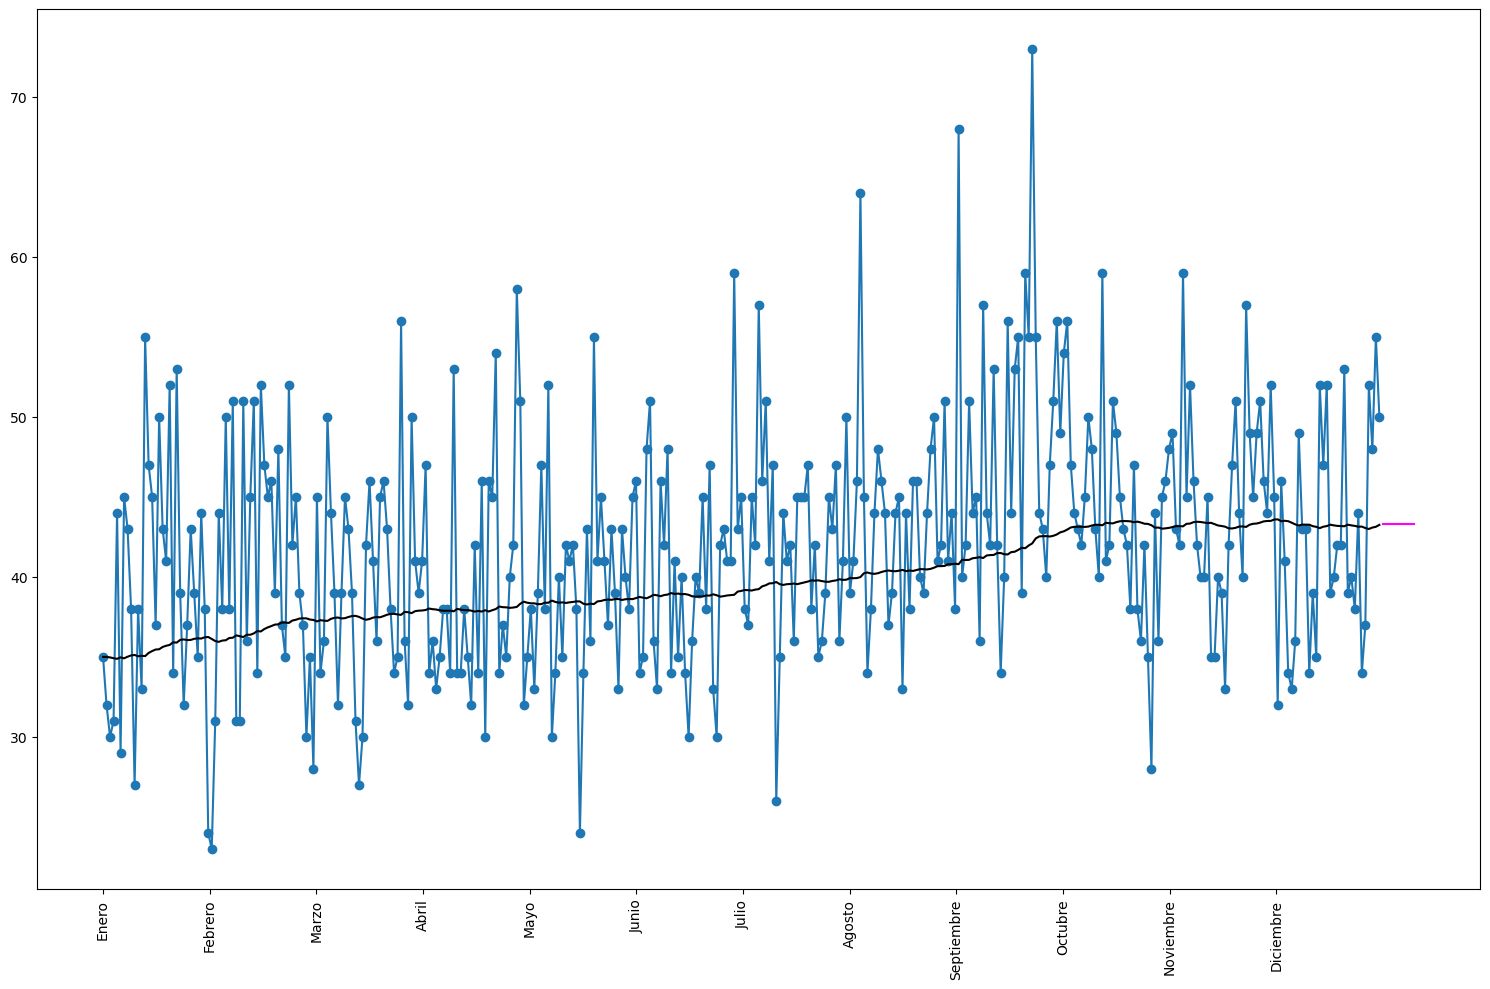

In [71]:
# Tiempo a predecir
h = 10

h_range = np.arange(data.index.size, data.index.size + h)

fig, ax = plt.subplots(figsize = (15, 10))

ax.plot(data.index, data["nacimientos"], marker="o")

ax.tick_params(axis="x", labelrotation = 90)

ses = SimpleExpSmoothing(data["nacimientos"])
model = ses.fit(smoothing_level=0.01, optimized = False)
forecast = model.forecast(h)

ax.plot(h_range, forecast, color="magenta")
ax.plot(data.index, model.fittedvalues, color="black")

ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
ax.xaxis.set_ticks(np.arange(0, data["nacimientos"].size, data["nacimientos"].size / 12))
plt.tight_layout()